In [47]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

In [48]:
sp500 = yf.Ticker("^NSEI")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-24 00:00:00+05:30,25243.300781,25246.250000,25018.699219,25062.099609,338700,0.0,0.0
2025-07-25 00:00:00+05:30,25010.349609,25010.349609,24806.349609,24837.000000,278100,0.0,0.0
2025-07-28 00:00:00+05:30,24782.449219,24889.199219,24646.599609,24680.900391,262100,0.0,0.0


In [49]:
sp500.index

DatetimeIndex(['2007-09-17 00:00:00+05:30', '2007-09-18 00:00:00+05:30',
               '2007-09-19 00:00:00+05:30', '2007-09-20 00:00:00+05:30',
               '2007-09-21 00:00:00+05:30', '2007-09-24 00:00:00+05:30',
               '2007-09-25 00:00:00+05:30', '2007-09-26 00:00:00+05:30',
               '2007-09-27 00:00:00+05:30', '2007-09-28 00:00:00+05:30',
               ...
               '2025-07-17 00:00:00+05:30', '2025-07-18 00:00:00+05:30',
               '2025-07-21 00:00:00+05:30', '2025-07-22 00:00:00+05:30',
               '2025-07-23 00:00:00+05:30', '2025-07-24 00:00:00+05:30',
               '2025-07-25 00:00:00+05:30', '2025-07-28 00:00:00+05:30',
               '2025-07-29 00:00:00+05:30', '2025-07-30 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=4383, freq=None)

<Axes: xlabel='Date'>

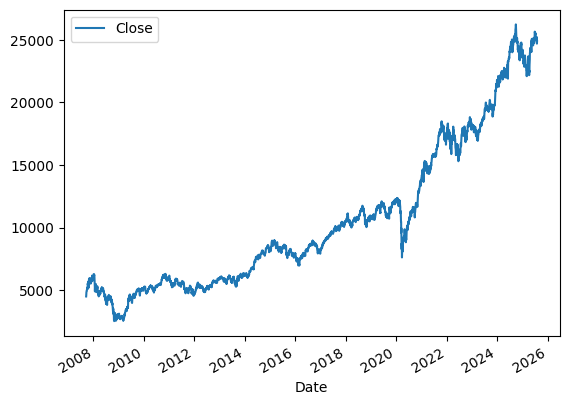

In [50]:
sp500.plot.line(y="Close", use_index=True)

In [51]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [52]:
sp500["Tommorow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tommorow
Date,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195
...,...,...,...,...,...,...
2025-07-24 00:00:00+05:30,25243.300781,25246.250000,25018.699219,25062.099609,338700,24837.000000
2025-07-25 00:00:00+05:30,25010.349609,25010.349609,24806.349609,24837.000000,278100,24680.900391
2025-07-28 00:00:00+05:30,24782.449219,24889.199219,24646.599609,24680.900391,262100,24821.099609


In [53]:
sp500["Target"] = (sp500["Tommorow"] > sp500["Close"]).astype(int)
sp500["MA_5"] = sp500["Close"].rolling(window=5).mean()
sp500["Return_1D"] = sp500["Close"].pct_change()
sp500["Volatility_5D"] = sp500["Return_1D"].rolling(window=5).std()
sp500

,Open,High,Low,Close,Volume,Tommorow,Target,MA_5,Return_1D,Volatility_5D
Date,,,,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1,NaN,NaN,NaN
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1,NaN,0.011469,NaN
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1,NaN,0.040946,NaN
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1,NaN,0.003212,NaN
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1,4671.659961,0.018957,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-07-24 00:00:00+05:30,25243.300781,25246.250000,25018.699219,25062.099609,338700,24837.000000,0,25080.400000,-0.006257,0.005842
2025-07-25 00:00:00+05:30,25010.349609,25010.349609,24806.349609,24837.000000,278100,24680.900391,0,25054.119922,-0.008982,0.006710
2025-07-28 00:00:00+05:30,24782.449219,24889.199219,24646.599609,24680.900391,262100,24821.099609,1,24972.160156,-0.006285,0.006071


In [54]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tommorow,Target,MA_5,Return_1D,Volatility_5D
Date,,,,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1,NaN,NaN,NaN
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1,NaN,0.011469,NaN
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1,NaN,0.040946,NaN
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1,NaN,0.003212,NaN
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1,4671.659961,0.018957,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-07-24 00:00:00+05:30,25243.300781,25246.250000,25018.699219,25062.099609,338700,24837.000000,0,25080.400000,-0.006257,0.005842
2025-07-25 00:00:00+05:30,25010.349609,25010.349609,24806.349609,24837.000000,278100,24680.900391,0,25054.119922,-0.008982,0.006710
2025-07-28 00:00:00+05:30,24782.449219,24889.199219,24646.599609,24680.900391,262100,24821.099609,1,24972.160156,-0.006285,0.006071


In [55]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,100
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [57]:
precision_score(test["Target"], preds)

0.46938775510204084

<Axes: xlabel='Date'>

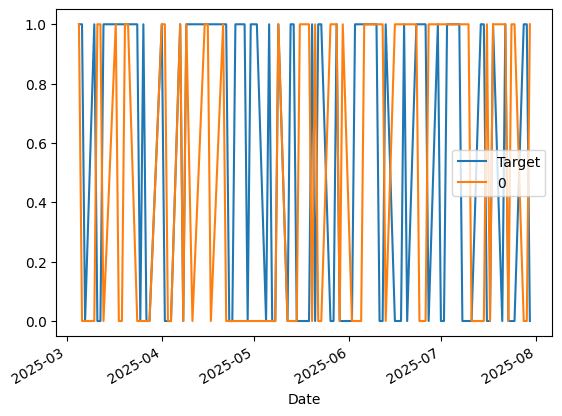

In [58]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [59]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [60]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [61]:
predictions = backtest(sp500, model, predictors)
predictions["Predictions"].value_counts()

Predictions
1    1070
0     813
Name: count, dtype: int64

In [62]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5308411214953271

In [63]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.542751
0    0.457249
Name: count, dtype: float64

In [64]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [65]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tommorow,Target,MA_5,Return_1D,Volatility_5D,Close_Ratio2,Trend_2,Close_Ratio5,Trend_5,Close_Ratio60,Trend_60,Close_Ratio250,Trend_250,Close_Ratio1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,
2011-10-13 00:00:00+05:30,5130.799805,5136.950195,5067.649902,5077.850098,0,5132.299805,1,5003.850000,-0.004226,0.015185,0.997883,1.0,1.014789,3.0,0.992330,23.0,0.911365,111.0,1.042939,510.0
2011-10-14 00:00:00+05:30,5057.350098,5141.399902,5056.600098,5132.299805,0,5118.250000,0,5052.700000,0.010723,0.012554,1.005333,1.0,1.015754,3.0,1.004393,24.0,0.921801,111.0,1.053995,510.0
2011-10-17 00:00:00+05:30,5156.200195,5160.200195,5084.500000,5118.250000,0,5037.500000,0,5080.429980,-0.002738,0.012433,0.998629,1.0,1.007444,2.0,1.003264,23.0,0.919921,111.0,1.051026,509.0
2011-10-18 00:00:00+05:30,5049.450195,5057.500000,5011.049805,5037.500000,0,5139.149902,1,5093.059961,-0.015777,0.015706,0.992049,0.0,0.989091,2.0,0.989147,23.0,0.906187,110.0,1.034383,508.0
2011-10-19 00:00:00+05:30,5080.450195,5148.049805,5075.299805,5139.149902,0,5091.899902,0,5101.009961,0.020179,0.013992,1.009989,1.0,1.007477,2.0,1.010438,24.0,0.925163,111.0,1.055190,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-23 00:00:00+05:30,25139.349609,25233.500000,25085.500000,25219.900391,271500,25062.099609,0,25090.269922,0.006345,0.005339,1.003162,1.0,1.005167,2.0,1.010562,30.0,1.039997,123.0,1.253735,535.0
2025-07-24 00:00:00+05:30,25243.300781,25246.250000,25018.699219,25062.099609,338700,24837.000000,0,25080.400000,-0.006257,0.005842,0.996862,1.0,0.999270,2.0,1.003751,30.0,1.033379,123.0,1.245312,535.0
2025-07-25 00:00:00+05:30,25010.349609,25010.349609,24806.349609,24837.000000,278100,24680.900391,0,25054.119922,-0.008982,0.006710,0.995489,0.0,0.991334,2.0,0.994410,29.0,1.024025,123.0,1.233566,535.0


In [66]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=10, max_depth=10, random_state=1)

In [67]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    preds[preds >= .7] = 1
    preds[preds < .7] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [68]:
predictions = backtest(sp500, model, new_predictors)
predictions["Predictions"].value_counts()

Predictions
0.0    870
1.0     12
Name: count, dtype: int64

In [69]:
precision_score(predictions["Target"], predictions["Predictions"])

0.75